In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

pd.options.display.max_columns=1000
plt.style.use(style='seaborn')

In [2]:
df_cgc = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/cgc.csv')
df_cgc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/7/2014,2.448,3.458,2.444,3.300,3.300,168600
1,4/8/2014,3.554,3.896,3.493,3.629,3.629,136800
2,4/9/2014,3.720,3.720,3.100,3.299,3.299,75200
3,4/10/2014,3.346,3.494,3.029,3.285,3.285,206100
4,4/11/2014,3.204,3.293,3.045,3.085,3.085,114600


In [3]:
df_cgc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2005 non-null   object 
 1   Open       2005 non-null   float64
 2   High       2005 non-null   float64
 3   Low        2005 non-null   float64
 4   Close      2005 non-null   float64
 5   Adj Close  2005 non-null   float64
 6   Volume     2005 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 109.8+ KB


In [4]:
df_cgc['Date'] = pd.to_datetime(df_cgc['Date'])
df_cgc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-04-07,2.448,3.458,2.444,3.300,3.300,168600
1,2014-04-08,3.554,3.896,3.493,3.629,3.629,136800
2,2014-04-09,3.720,3.720,3.100,3.299,3.299,75200
3,2014-04-10,3.346,3.494,3.029,3.285,3.285,206100
4,2014-04-11,3.204,3.293,3.045,3.085,3.085,114600


In [5]:
df_cgc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2005 non-null   datetime64[ns]
 1   Open       2005 non-null   float64       
 2   High       2005 non-null   float64       
 3   Low        2005 non-null   float64       
 4   Close      2005 non-null   float64       
 5   Adj Close  2005 non-null   float64       
 6   Volume     2005 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 109.8 KB


In [6]:
df_cgc = df_cgc.set_index('Date')
df_cgc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-04-07,2.448,3.458,2.444,3.300,3.300,168600
2014-04-08,3.554,3.896,3.493,3.629,3.629,136800
2014-04-09,3.720,3.720,3.100,3.299,3.299,75200
2014-04-10,3.346,3.494,3.029,3.285,3.285,206100
2014-04-11,3.204,3.293,3.045,3.085,3.085,114600


In [7]:
df_djix = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/djix.csv')
df_djix['Date'] = pd.to_datetime(df_djix['Date'])
df_djix = df_djix.set_index('Date')
df_djix.head()

,Open,High,Low,Close,Volume
Date,,,,,
1896-05-27,29.39,29.39,29.39,29.39,NaN
1896-05-28,29.11,29.11,29.11,29.11,NaN
1896-05-29,29.43,29.43,29.43,29.43,NaN
1896-06-01,29.40,29.40,29.40,29.40,NaN
1896-06-02,29.00,29.00,29.00,29.00,NaN


In [8]:
df_djix = df_djix.rename(columns={'Open':'djix_Open', 'High':'djix_High', 'Low':'djix_Low', 'Close':'djix_Close', 'Volume':'djix_Volume'})
# df_djix = df_djix.drop('Adj Close', axis=1)
df_djix.head()

,djix_Open,djix_High,djix_Low,djix_Close,djix_Volume
Date,,,,,
1896-05-27,29.39,29.39,29.39,29.39,NaN
1896-05-28,29.11,29.11,29.11,29.11,NaN
1896-05-29,29.43,29.43,29.43,29.43,NaN
1896-06-01,29.40,29.40,29.40,29.40,NaN
1896-06-02,29.00,29.00,29.00,29.00,NaN


In [9]:
df_cgc = df_cgc.merge(df_djix, on='Date', how='left')
df_cgc.head()

,Open,High,Low,Close,Adj Close,Volume,djix_Open,djix_High,djix_Low,djix_Close,djix_Volume
Date,,,,,,,,,,,
2014-04-07,2.448,3.458,2.444,3.300,3.300,168600,16420.81,16421.25,16244.39,16245.87,116637706.0
2014-04-08,3.554,3.896,3.493,3.629,3.629,136800,16245.87,16296.86,16180.68,16256.14,98516515.0
2014-04-09,3.720,3.720,3.100,3.299,3.299,75200,16256.14,16438.82,16256.14,16437.18,91547700.0
2014-04-10,3.346,3.494,3.029,3.285,3.285,206100,16437.18,16455.29,16153.59,16170.22,112559553.0
2014-04-11,3.204,3.293,3.045,3.085,3.085,114600,16170.22,16170.22,16015.32,16052.12,119598160.0


In [10]:
# df = cgc[['Close']].copy()
# df.head()

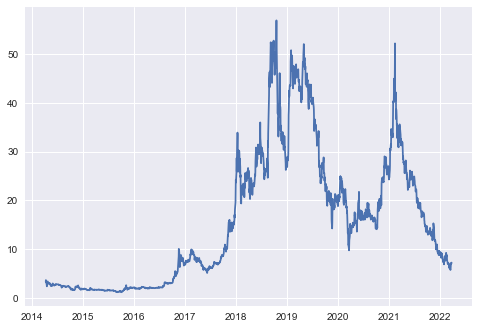

In [11]:
plt.plot(df_cgc['Close'])

In [12]:
df_cgc['prev_close'] = df_cgc['Close'].shift(1)
df_cgc.head(3)

,Open,High,Low,Close,Adj Close,Volume,djix_Open,djix_High,djix_Low,djix_Close,djix_Volume,prev_close
Date,,,,,,,,,,,,
2014-04-07,2.448,3.458,2.444,3.300,3.300,168600,16420.81,16421.25,16244.39,16245.87,116637706.0,NaN
2014-04-08,3.554,3.896,3.493,3.629,3.629,136800,16245.87,16296.86,16180.68,16256.14,98516515.0,3.300
2014-04-09,3.720,3.720,3.100,3.299,3.299,75200,16256.14,16438.82,16256.14,16437.18,91547700.0,3.629


In [13]:
df_cgc['next_close'] = df_cgc['Close'].shift(-1)
df_cgc.head(3)

,Open,High,Low,Close,Adj Close,Volume,djix_Open,djix_High,djix_Low,djix_Close,djix_Volume,prev_close,next_close
Date,,,,,,,,,,,,,
2014-04-07,2.448,3.458,2.444,3.300,3.300,168600,16420.81,16421.25,16244.39,16245.87,116637706.0,NaN,3.629
2014-04-08,3.554,3.896,3.493,3.629,3.629,136800,16245.87,16296.86,16180.68,16256.14,98516515.0,3.300,3.299
2014-04-09,3.720,3.720,3.100,3.299,3.299,75200,16256.14,16438.82,16256.14,16437.18,91547700.0,3.629,3.285


In [14]:
df_cgc['diff'] = df_cgc['Close'].diff()
df_cgc.head(3)

,Open,High,Low,Close,Adj Close,Volume,djix_Open,djix_High,djix_Low,djix_Close,djix_Volume,prev_close,next_close,diff
Date,,,,,,,,,,,,,,
2014-04-07,2.448,3.458,2.444,3.300,3.300,168600,16420.81,16421.25,16244.39,16245.87,116637706.0,NaN,3.629,NaN
2014-04-08,3.554,3.896,3.493,3.629,3.629,136800,16245.87,16296.86,16180.68,16256.14,98516515.0,3.300,3.299,0.329
2014-04-09,3.720,3.720,3.100,3.299,3.299,75200,16256.14,16438.82,16256.14,16437.18,91547700.0,3.629,3.285,-0.330


In [15]:
df_cgc['%change'] = df_cgc['Close'].pct_change()
df_cgc.head(3)

,Open,High,Low,Close,Adj Close,Volume,djix_Open,djix_High,djix_Low,djix_Close,djix_Volume,prev_close,next_close,diff,%change
Date,,,,,,,,,,,,,,,
2014-04-07,2.448,3.458,2.444,3.300,3.300,168600,16420.81,16421.25,16244.39,16245.87,116637706.0,NaN,3.629,NaN,NaN
2014-04-08,3.554,3.896,3.493,3.629,3.629,136800,16245.87,16296.86,16180.68,16256.14,98516515.0,3.300,3.299,0.329,0.099697
2014-04-09,3.720,3.720,3.100,3.299,3.299,75200,16256.14,16438.82,16256.14,16437.18,91547700.0,3.629,3.285,-0.330,-0.090934


In [16]:
df_cgc['5day_avg_close'] = df_cgc['Close'].rolling(5).mean()
df_cgc.head(3)

,Open,High,Low,Close,Adj Close,Volume,djix_Open,djix_High,djix_Low,djix_Close,djix_Volume,prev_close,next_close,diff,%change,5day_avg_close
Date,,,,,,,,,,,,,,,,
2014-04-07,2.448,3.458,2.444,3.300,3.300,168600,16420.81,16421.25,16244.39,16245.87,116637706.0,NaN,3.629,NaN,NaN,NaN
2014-04-08,3.554,3.896,3.493,3.629,3.629,136800,16245.87,16296.86,16180.68,16256.14,98516515.0,3.300,3.299,0.329,0.099697,NaN
2014-04-09,3.720,3.720,3.100,3.299,3.299,75200,16256.14,16438.82,16256.14,16437.18,91547700.0,3.629,3.285,-0.330,-0.090934,NaN


In [17]:
df_cgc['5day_avg_diff'] = df_cgc['diff'].rolling(5).mean()
df_cgc.head(3)

,Open,High,Low,Close,Adj Close,Volume,djix_Open,djix_High,djix_Low,djix_Close,djix_Volume,prev_close,next_close,diff,%change,5day_avg_close,5day_avg_diff
Date,,,,,,,,,,,,,,,,,
2014-04-07,2.448,3.458,2.444,3.300,3.300,168600,16420.81,16421.25,16244.39,16245.87,116637706.0,NaN,3.629,NaN,NaN,NaN,NaN
2014-04-08,3.554,3.896,3.493,3.629,3.629,136800,16245.87,16296.86,16180.68,16256.14,98516515.0,3.300,3.299,0.329,0.099697,NaN,NaN
2014-04-09,3.720,3.720,3.100,3.299,3.299,75200,16256.14,16438.82,16256.14,16437.18,91547700.0,3.629,3.285,-0.330,-0.090934,NaN,NaN


In [18]:
df_cgc['10day_avg_close'] = df_cgc['Close'].rolling(10).mean()
df_cgc.head(3)

,Open,High,Low,Close,Adj Close,Volume,djix_Open,djix_High,djix_Low,djix_Close,djix_Volume,prev_close,next_close,diff,%change,5day_avg_close,5day_avg_diff,10day_avg_close
Date,,,,,,,,,,,,,,,,,,
2014-04-07,2.448,3.458,2.444,3.300,3.300,168600,16420.81,16421.25,16244.39,16245.87,116637706.0,NaN,3.629,NaN,NaN,NaN,NaN,NaN
2014-04-08,3.554,3.896,3.493,3.629,3.629,136800,16245.87,16296.86,16180.68,16256.14,98516515.0,3.300,3.299,0.329,0.099697,NaN,NaN,NaN
2014-04-09,3.720,3.720,3.100,3.299,3.299,75200,16256.14,16438.82,16256.14,16437.18,91547700.0,3.629,3.285,-0.330,-0.090934,NaN,NaN,NaN


In [19]:
df_cgc['10day_avg_diff'] = df_cgc['diff'].rolling(10).mean()
df_cgc.head(3)

,Open,High,Low,Close,Adj Close,Volume,djix_Open,djix_High,djix_Low,djix_Close,djix_Volume,prev_close,next_close,diff,%change,5day_avg_close,5day_avg_diff,10day_avg_close,10day_avg_diff
Date,,,,,,,,,,,,,,,,,,,
2014-04-07,2.448,3.458,2.444,3.300,3.300,168600,16420.81,16421.25,16244.39,16245.87,116637706.0,NaN,3.629,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-08,3.554,3.896,3.493,3.629,3.629,136800,16245.87,16296.86,16180.68,16256.14,98516515.0,3.300,3.299,0.329,0.099697,NaN,NaN,NaN,NaN
2014-04-09,3.720,3.720,3.100,3.299,3.299,75200,16256.14,16438.82,16256.14,16437.18,91547700.0,3.629,3.285,-0.330,-0.090934,NaN,NaN,NaN,NaN


In [20]:
df_cgc['year'] = df_cgc.index.year
df_cgc.head(1)

,Open,High,Low,Close,Adj Close,Volume,djix_Open,djix_High,djix_Low,djix_Close,djix_Volume,prev_close,next_close,diff,%change,5day_avg_close,5day_avg_diff,10day_avg_close,10day_avg_diff,year
Date,,,,,,,,,,,,,,,,,,,,
2014-04-07,2.448,3.458,2.444,3.3,3.3,168600,16420.81,16421.25,16244.39,16245.87,116637706.0,NaN,3.629,NaN,NaN,NaN,NaN,NaN,NaN,2014


In [21]:
df_cgc['month'] = df_cgc.index.month
df_cgc.head(1)

,Open,High,Low,Close,Adj Close,Volume,djix_Open,djix_High,djix_Low,djix_Close,djix_Volume,prev_close,next_close,diff,%change,5day_avg_close,5day_avg_diff,10day_avg_close,10day_avg_diff,year,month
Date,,,,,,,,,,,,,,,,,,,,,
2014-04-07,2.448,3.458,2.444,3.3,3.3,168600,16420.81,16421.25,16244.39,16245.87,116637706.0,NaN,3.629,NaN,NaN,NaN,NaN,NaN,NaN,2014,4


In [22]:
df_cgc['day'] = df_cgc.index.day
df_cgc.head(1)

,Open,High,Low,Close,Adj Close,Volume,djix_Open,djix_High,djix_Low,djix_Close,djix_Volume,prev_close,next_close,diff,%change,5day_avg_close,5day_avg_diff,10day_avg_close,10day_avg_diff,year,month,day
Date,,,,,,,,,,,,,,,,,,,,,,
2014-04-07,2.448,3.458,2.444,3.3,3.3,168600,16420.81,16421.25,16244.39,16245.87,116637706.0,NaN,3.629,NaN,NaN,NaN,NaN,NaN,NaN,2014,4,7


In [23]:
df_cgc['quarter'] = (df_cgc['month']-1)//3 + 1
df_cgc.head(1)

,Open,High,Low,Close,Adj Close,Volume,djix_Open,djix_High,djix_Low,djix_Close,djix_Volume,prev_close,next_close,diff,%change,5day_avg_close,5day_avg_diff,10day_avg_close,10day_avg_diff,year,month,day,quarter
Date,,,,,,,,,,,,,,,,,,,,,,,
2014-04-07,2.448,3.458,2.444,3.3,3.3,168600,16420.81,16421.25,16244.39,16245.87,116637706.0,NaN,3.629,NaN,NaN,NaN,NaN,NaN,NaN,2014,4,7,2


In [24]:
df_cgc = df_cgc.dropna()
df_cgc.head(3)

,Open,High,Low,Close,Adj Close,Volume,djix_Open,djix_High,djix_Low,djix_Close,djix_Volume,prev_close,next_close,diff,%change,5day_avg_close,5day_avg_diff,10day_avg_close,10day_avg_diff,year,month,day,quarter
Date,,,,,,,,,,,,,,,,,,,,,,,
2014-04-22,3.349,3.349,3.108,3.108,3.108,75400,16449.25,16565.71,16445.59,16514.37,84836736.0,3.355,3.097,-0.247,-0.073621,2.9554,0.0880,3.0743,-0.0192,2014,4,22,2
2014-04-23,3.089,3.217,2.990,3.097,3.097,93700,16514.37,16525.67,16477.35,16501.65,76822841.0,3.108,3.070,-0.011,-0.003539,3.1060,0.1506,3.0211,-0.0532,2014,4,23,2
2014-04-24,3.069,3.150,3.041,3.070,3.070,28300,16501.65,16541.26,16452.30,16501.65,80340538.0,3.097,3.039,-0.027,-0.008718,3.1440,0.0380,2.9982,-0.0229,2014,4,24,2


In [25]:
n = int(len(df_cgc) * 0.9)
n

1794

In [26]:
train = df_cgc[:n]
test = df_cgc[n:]

In [27]:
print(len(train))
print(len(test))

1794
200


In [28]:
n2 = len(test)
n2

200

In [29]:
X_train = train.drop('next_close', axis=1)
X_train.head(3)

,Open,High,Low,Close,Adj Close,Volume,djix_Open,djix_High,djix_Low,djix_Close,djix_Volume,prev_close,diff,%change,5day_avg_close,5day_avg_diff,10day_avg_close,10day_avg_diff,year,month,day,quarter
Date,,,,,,,,,,,,,,,,,,,,,,
2014-04-22,3.349,3.349,3.108,3.108,3.108,75400,16449.25,16565.71,16445.59,16514.37,84836736.0,3.355,-0.247,-0.073621,2.9554,0.0880,3.0743,-0.0192,2014,4,22,2
2014-04-23,3.089,3.217,2.990,3.097,3.097,93700,16514.37,16525.67,16477.35,16501.65,76822841.0,3.108,-0.011,-0.003539,3.1060,0.1506,3.0211,-0.0532,2014,4,23,2
2014-04-24,3.069,3.150,3.041,3.070,3.070,28300,16501.65,16541.26,16452.30,16501.65,80340538.0,3.097,-0.027,-0.008718,3.1440,0.0380,2.9982,-0.0229,2014,4,24,2


In [30]:
X_train.shape

(1794, 22)

In [31]:
y_train = train['next_close']
y_train.head(3)

Date
2014-04-22    3.097
2014-04-23    3.070
2014-04-24    3.039
Name: next_close, dtype: float64

In [32]:
y_train.tail(3)

Date
2021-06-02    25.27
2021-06-03    24.25
2021-06-04    25.65
Name: next_close, dtype: float64

In [33]:
type(y_train)

pandas.core.series.Series

In [34]:
X_test = test.drop('next_close', axis=1)
y_test = test['next_close']

In [35]:
X_test.head(3)

,Open,High,Low,Close,Adj Close,Volume,djix_Open,djix_High,djix_Low,djix_Close,djix_Volume,prev_close,diff,%change,5day_avg_close,5day_avg_diff,10day_avg_close,10day_avg_diff,year,month,day,quarter
Date,,,,,,,,,,,,,,,,,,,,,,
2021-06-07,24.450001,25.830000,24.139999,25.65,25.65,3387700,34766.20,34820.91,34574.51,34630.24,299990040.0,24.25,1.40,0.057732,25.006,-0.088,24.701,0.267,2021,6,7,2
2021-06-08,25.715000,25.930000,24.836000,25.51,25.51,3158900,34645.84,34665.38,34452.94,34599.82,340651885.0,25.65,-0.14,-0.005458,25.252,0.246,24.984,0.283,2021,6,8,2
2021-06-09,25.740000,26.799999,25.520000,25.74,25.74,4593000,34626.16,34654.67,34439.37,34447.14,302696556.0,25.51,0.23,0.009016,25.284,0.032,25.143,0.159,2021,6,9,2


In [36]:
X_test.shape

(200, 22)

In [37]:
y_test.tail(3)

Date
2022-03-17    7.12
2022-03-18    7.02
2022-03-21    7.21
Name: next_close, dtype: float64

In [38]:
from sklearn.linear_model import LinearRegression
hyper_table = list()

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [39]:
y_pred[:5]

array([25.57385138, 25.49253908, 25.63174292, 25.72535354, 25.8283655 ])

In [40]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man = rmse_manual(y_test, y_pred)
print(rmse_man)

0.5203343444737009


In [41]:
rmse_auto = mean_squared_error(y_test, y_pred, squared=False)
print(rmse_auto)

0.5203343444737009


In [42]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man = mae_manual(y_test, y_pred)
print(mae_man)

0.4077656289089277


In [43]:
mae_auto = mean_absolute_error(y_test, y_pred)
print(mae_auto)

0.4077656289089279


In [44]:
hyper_table.append(dict(model=model, rmse=rmse_man))

In [45]:
hyper_table = pd.DataFrame(hyper_table)
hyper_table

,model,rmse
0,LinearRegression(),0.520334


In [46]:
y_train = pd.DataFrame(y_train, columns=['next_close'])
y_test = pd.DataFrame(y_test, columns=['next_close'])

In [47]:
y_test['pred_next_close'] = y_pred

In [49]:
y_test.tail()

,next_close,pred_next_close
Date,,
2022-03-15,6.38,6.002161
2022-03-16,6.77,6.372420
2022-03-17,7.12,6.812861
2022-03-18,7.02,7.254885
2022-03-21,7.21,7.078500


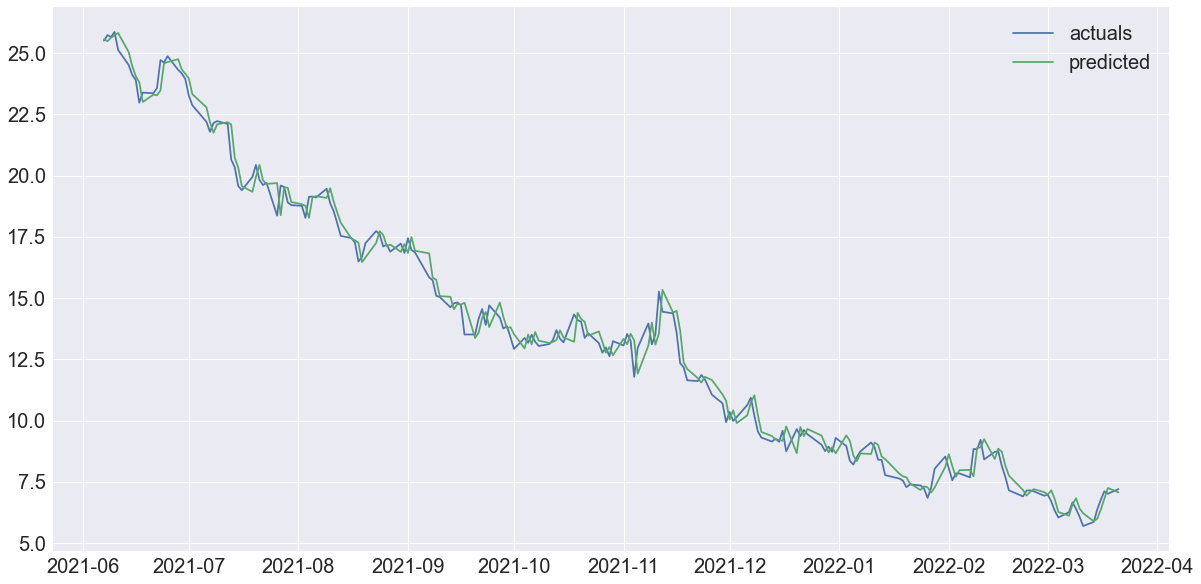

In [55]:
fig, ax = plt.subplots(figsize=(20,10))
#ax.plot(y_train)
ax.plot(y_test['next_close'])
ax.plot(y_test['pred_next_close'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

In [56]:
cgc_sim = df_cgc[n:]
cgc_sim = cgc_sim[['Open', 'Close']]
cgc_sim.head()

,Open,Close
Date,,
2021-06-07,24.450001,25.650000
2021-06-08,25.715000,25.510000
2021-06-09,25.740000,25.740000
2021-06-10,25.686001,25.660000
2021-06-11,25.780001,25.870001


In [57]:
cgc_sim.shape

(200, 2)

In [58]:
cgc_sim.tail()

,Open,Close
Date,,
2022-03-15,5.82,5.87
2022-03-16,6.01,6.38
2022-03-17,6.36,6.77
2022-03-18,6.70,7.12
2022-03-21,7.20,7.02


In [59]:
# cgc_sim = cgc_sim.tail(cgc_sim.shape[0] -5)
# cgc_sim.head()

In [60]:
# cgc_sim.drop(cgc_sim.tail(1).index,inplace=True)
# cgc_sim.tail()

In [61]:
cgc_sim.shape

(200, 2)

In [62]:
cgc_sim['Pred_Close'] = y_pred
cgc_sim.head()

,Open,Close,Pred_Close
Date,,,
2021-06-07,24.450001,25.650000,25.573851
2021-06-08,25.715000,25.510000,25.492539
2021-06-09,25.740000,25.740000,25.631743
2021-06-10,25.686001,25.660000,25.725354
2021-06-11,25.780001,25.870001,25.828365


In [63]:
cgc_sim['Trade'] = cgc_sim['Pred_Close'] > cgc_sim['Open']
cgc_sim.head()

,Open,Close,Pred_Close,Trade
Date,,,,
2021-06-07,24.450001,25.650000,25.573851,True
2021-06-08,25.715000,25.510000,25.492539,False
2021-06-09,25.740000,25.740000,25.631743,False
2021-06-10,25.686001,25.660000,25.725354,True
2021-06-11,25.780001,25.870001,25.828365,True


In [64]:
cgc_sim = pd.get_dummies(cgc_sim, columns=['Trade'])
cgc_sim.head()

,Open,Close,Pred_Close,Trade_False,Trade_True
Date,,,,,
2021-06-07,24.450001,25.650000,25.573851,0,1
2021-06-08,25.715000,25.510000,25.492539,1,0
2021-06-09,25.740000,25.740000,25.631743,1,0
2021-06-10,25.686001,25.660000,25.725354,0,1
2021-06-11,25.780001,25.870001,25.828365,0,1


In [65]:
cgc_sim = cgc_sim.drop('Trade_False', axis=1)
cgc_sim = cgc_sim.rename(columns={'Trade_True':'Trade'})
cgc_sim.head()

,Open,Close,Pred_Close,Trade
Date,,,,
2021-06-07,24.450001,25.650000,25.573851,1
2021-06-08,25.715000,25.510000,25.492539,0
2021-06-09,25.740000,25.740000,25.631743,0
2021-06-10,25.686001,25.660000,25.725354,1
2021-06-11,25.780001,25.870001,25.828365,1


In [66]:
cgc_sim['Gains'] = (cgc_sim['Close'] - cgc_sim['Open'])*100
cgc_sim.head()

,Open,Close,Pred_Close,Trade,Gains
Date,,,,,
2021-06-07,24.450001,25.650000,25.573851,1,119.9999
2021-06-08,25.715000,25.510000,25.492539,0,-20.5000
2021-06-09,25.740000,25.740000,25.631743,0,0.0000
2021-06-10,25.686001,25.660000,25.725354,1,-2.6001
2021-06-11,25.780001,25.870001,25.828365,1,9.0000


In [67]:
cgc_sim['Gains'] = cgc_sim['Gains'].where(cgc_sim['Gains']>0, other=0.0)
cgc_sim.head()

,Open,Close,Pred_Close,Trade,Gains
Date,,,,,
2021-06-07,24.450001,25.650000,25.573851,1,119.9999
2021-06-08,25.715000,25.510000,25.492539,0,0.0000
2021-06-09,25.740000,25.740000,25.631743,0,0.0000
2021-06-10,25.686001,25.660000,25.725354,1,0.0000
2021-06-11,25.780001,25.870001,25.828365,1,9.0000


In [68]:
total_gains = cgc_sim['Gains'].sum()
total_gains

2894.300299999998